Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.


In [2]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [8]:
df=pd.read_csv("crime_data.csv")
df.head()
df.drop(columns="Unnamed: 0",axis=1,inplace=True)
df.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [9]:
df.isna().sum()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [10]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')

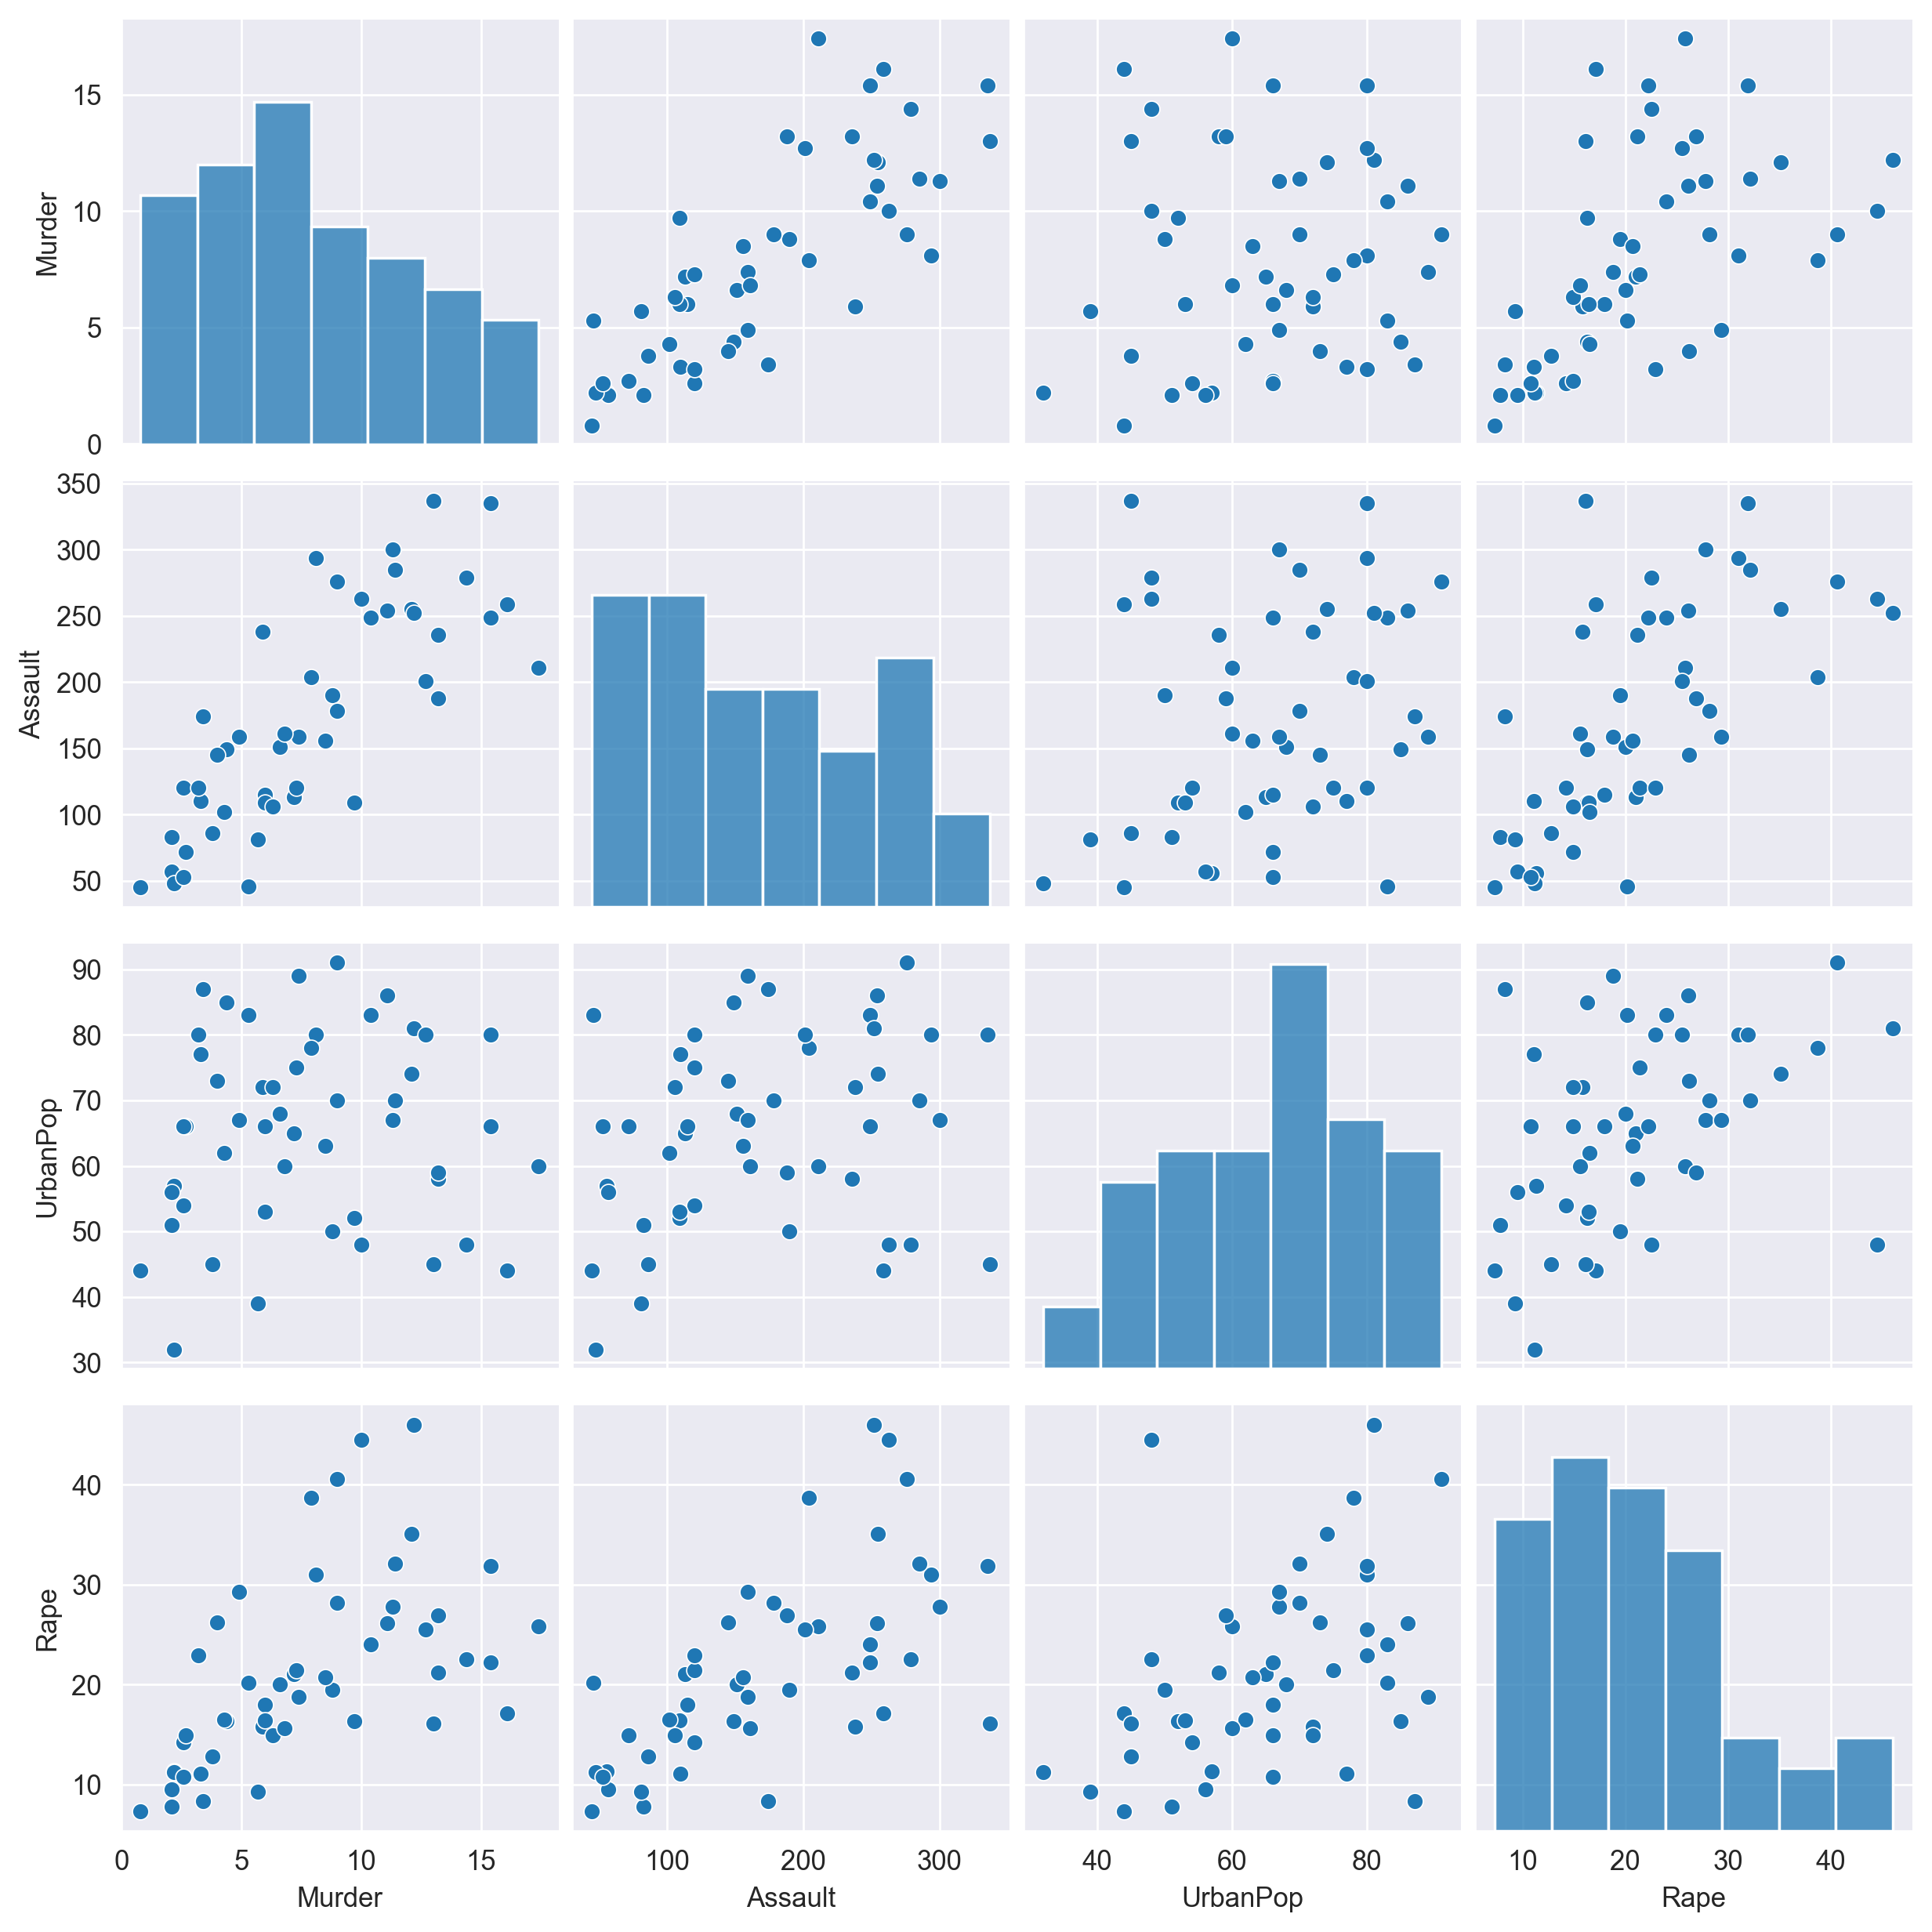

In [11]:
sns.pairplot(df)

# Feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler

stdscale=StandardScaler()
scaledf=stdscale.fit_transform(df)
x=pd.DataFrame(columns=df.columns,data=scaledf)
x.head()
x.describe()

,Murder,Assault,UrbanPop,Rape
count,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01
mean,-8.437695e-17,1.298961e-16,-4.263256e-16,8.326673e-16
std,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00
min,-1.620693e+00,-1.524362e+00,-2.340661e+00,-1.502548e+00
25%,-8.611383e-01,-7.486054e-01,-7.704502e-01,-6.640245e-01
50%,-1.247758e-01,-1.425453e-01,3.210209e-02,-1.220847e-01
75%,8.029251e-01,9.483628e-01,8.521012e-01,5.330962e-01
max,2.229265e+00,2.015028e+00,1.776781e+00,2.671197e+00


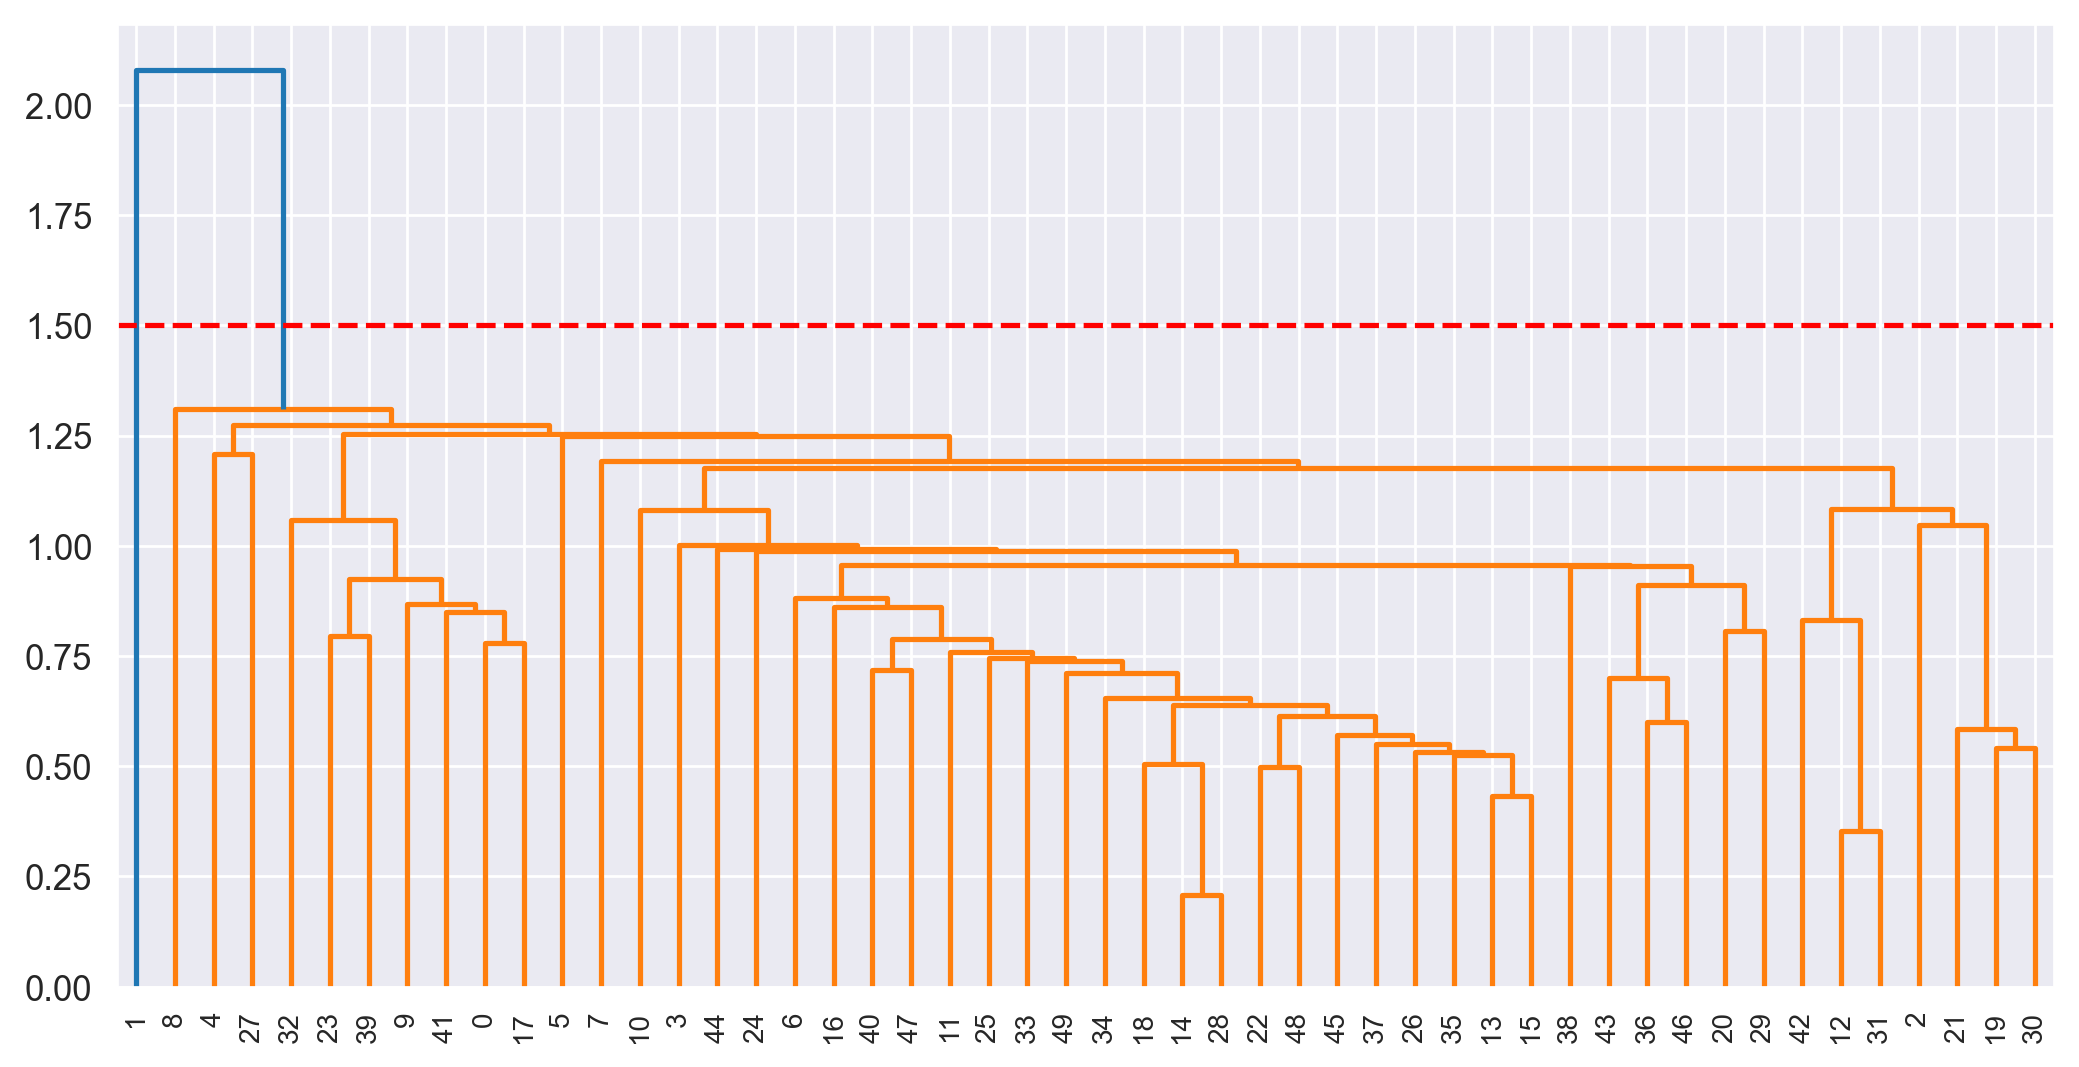

In [19]:
from scipy.cluster import hierarchy
lg=hierarchy.linkage(x,method='single')
dn = hierarchy.dendrogram(lg)
plt.axhline(y = 1.50 , c = 'red', linestyle = '--')
plt.show()

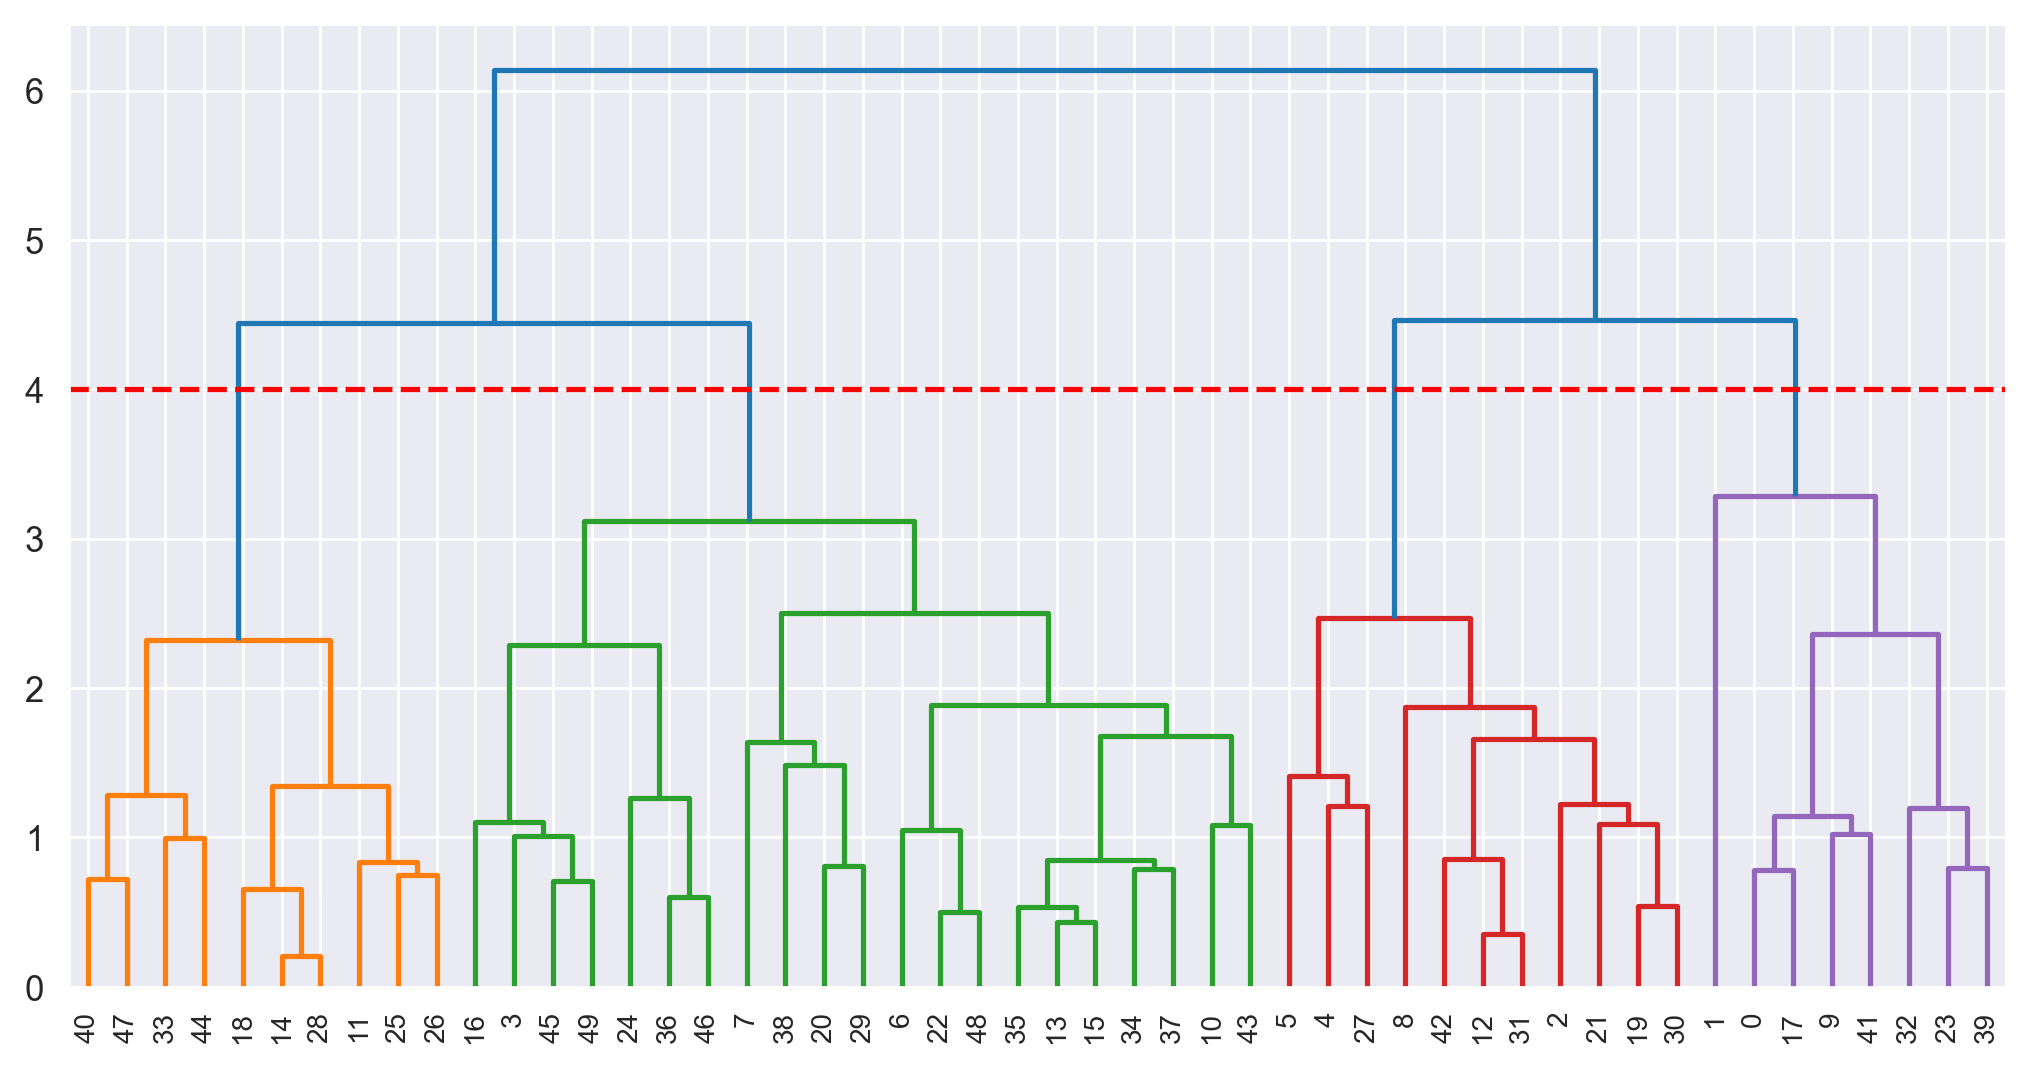

In [17]:
import matplotlib.pyplot as plt
lk = hierarchy.linkage(x,method='complete')
dendrogram = hierarchy.dendrogram(lk)
plt.axhline(y = 4 , c = 'red', linestyle = '--')
plt.show()

# MODEL BUILDING

In [22]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=4)

y = hc.fit_predict(x)
df['Cluster'] = y
df.head()

,Murder,Assault,UrbanPop,Rape,Cluster
0,13.2,236,58,21.2,3
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,1


In [23]:
df.groupby('Cluster').agg('mean')

,Murder,Assault,UrbanPop,Rape
Cluster,,,,
0,6.210526,142.052632,71.263158,19.184211
1,10.966667,264.000000,76.500000,33.608333
2,3.091667,76.000000,52.083333,11.833333
3,14.671429,251.285714,54.285714,21.685714


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Murder', ylabel='Assault'>

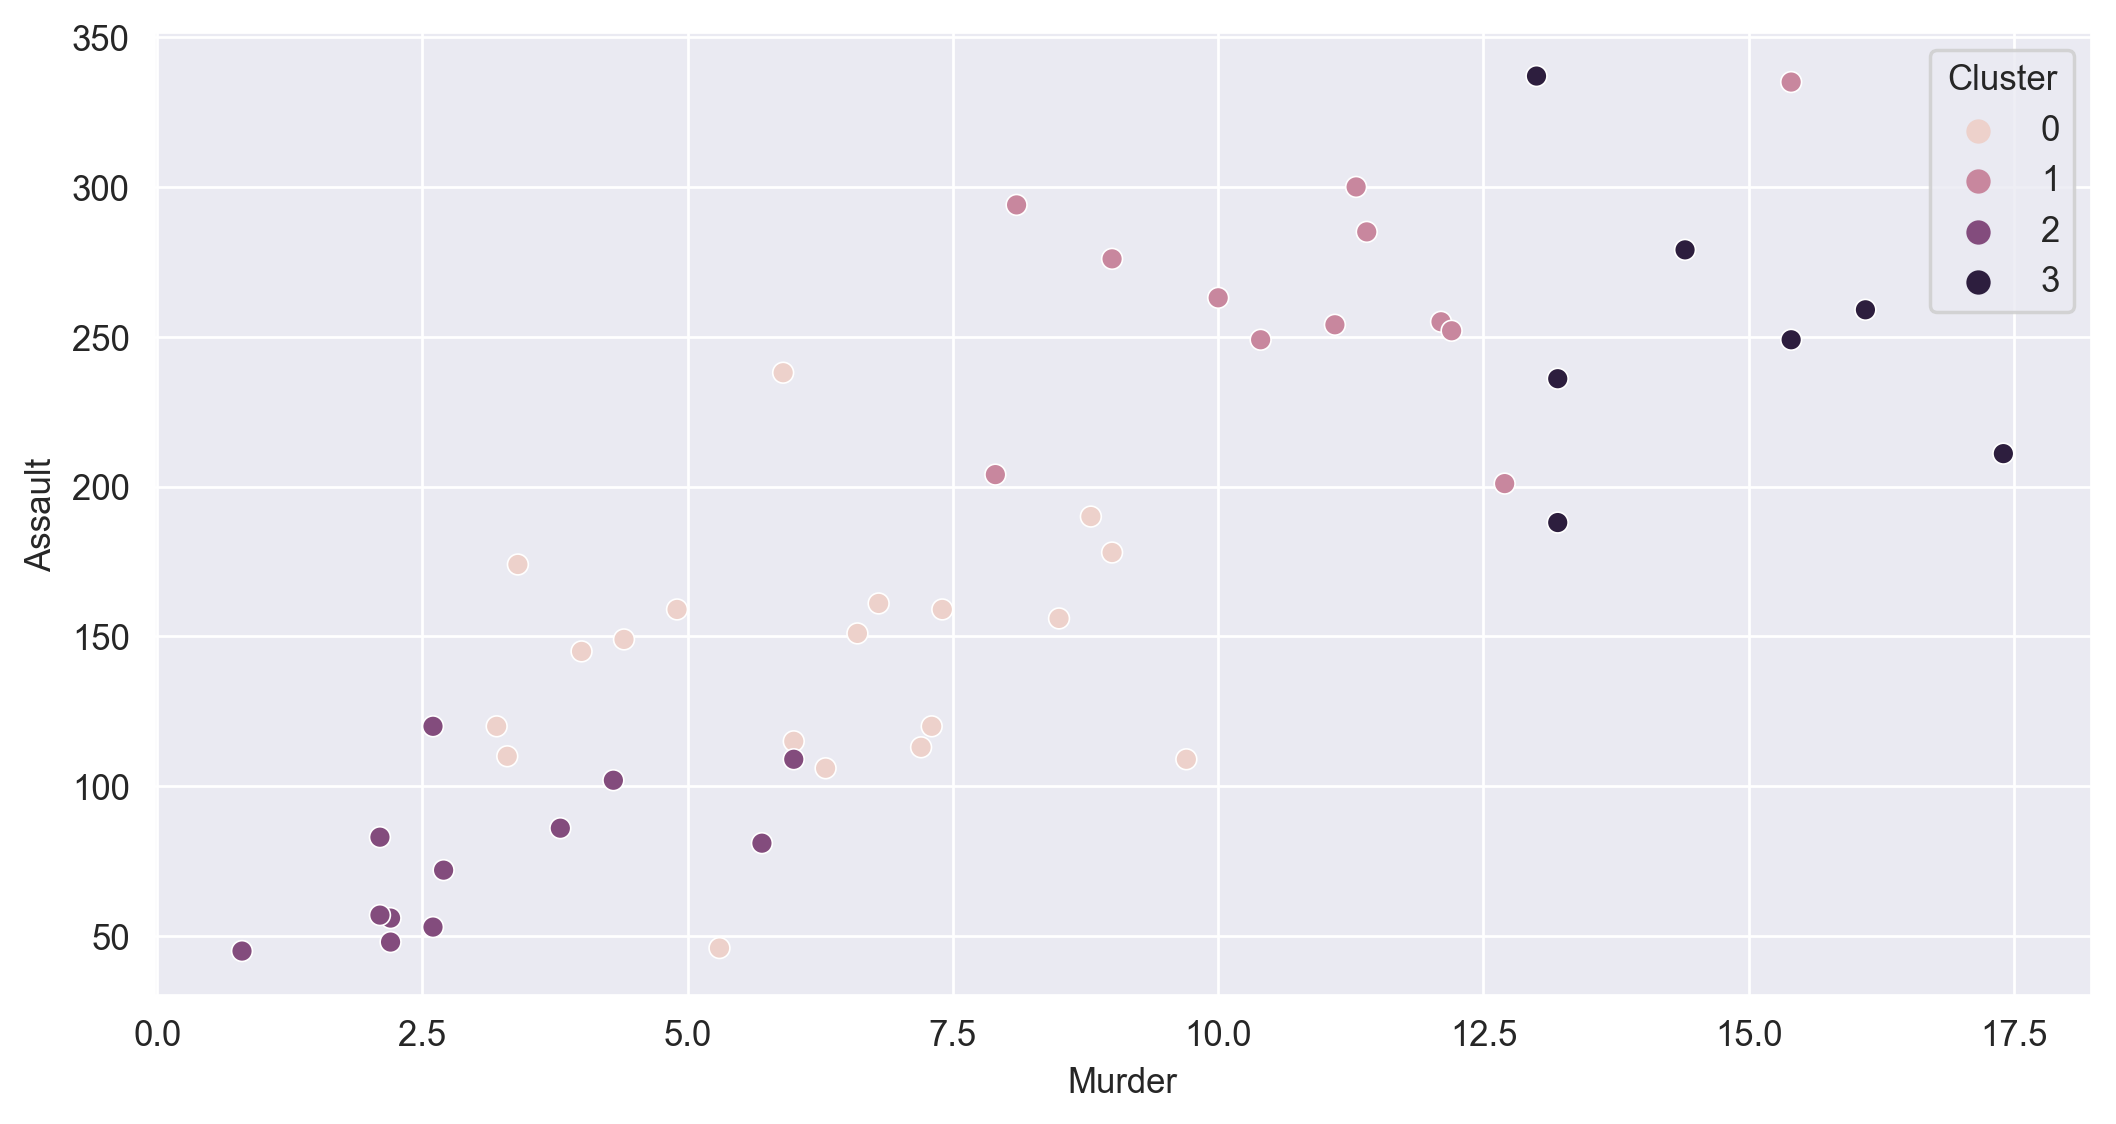

In [24]:
sns.scatterplot(df['Murder'], df['Assault'], hue = df['Cluster'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Murder', ylabel='Rape'>

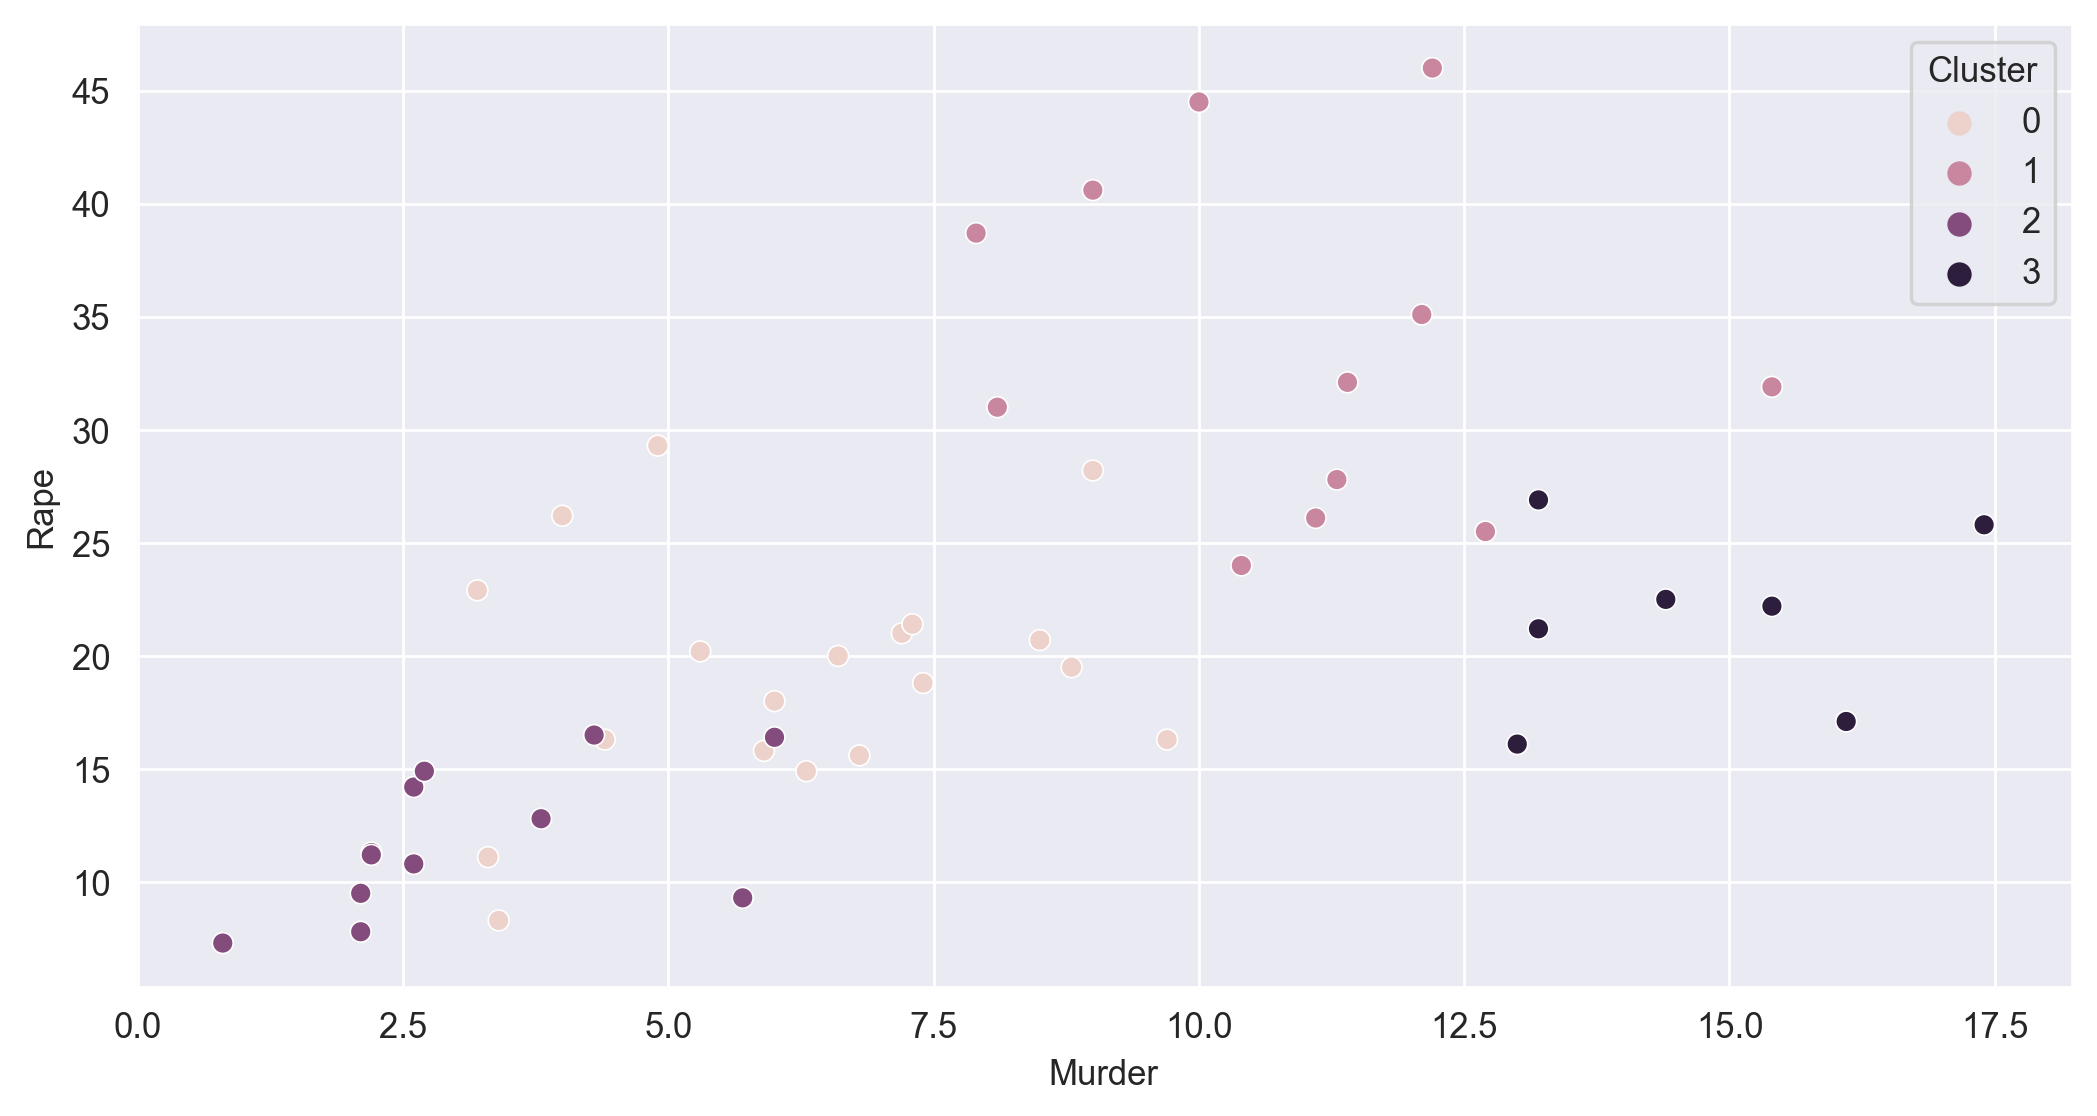

In [28]:
sns.scatterplot(df['Murder'], df['Rape'], hue = df['Cluster'])

Based on these average values, we can make some general observations:

Cluster 0: This cluster has relatively low values for Murder, Assault, and Rape, indicating lower crime rates in these categories. The UrbanPop value is moderate.

Cluster 1: This cluster has higher values for Murder, Assault, UrbanPop, and Rape, suggesting higher crime rates and larger urban populations.

Cluster 2: This cluster has the lowest values for Murder, Assault, and UrbanPop, indicating lower crime rates and smaller urban populations. The Rape value is also low.

Cluster 3: This cluster has the highest values for Murder and Assault, suggesting higher crime rates in these categories. The UrbanPop value is moderate, and the Rape value is relatively high.

It's important to note that these interpretations are based on the average values of the variables within each cluster. The specific interpretation and context may vary depending on the specific dataset and domain knowledge.